# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from plotly import tools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from chart_studio import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go

In [2]:
pd.set_option('display.max_columns', None)

# Data Loading

In [3]:
match = pd.read_csv('games.csv')
match.head()

gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0  3326086514  1504279457970          1949         9       1           2   
1  3229566029  1497848803862          1851         9       1           1   
2  3327363504  1504360103310          1493         9       1           2   
3  3326856598  1504348503996          1758         9       1           1   
4  3330080762  1504554410899          2094         9       1           2   

   firstTower  firstInhibitor  firstBaron  firstDragon  firstRiftHerald  \
0           1               1           1            1                2   
1           1               1           0            1                1   
2           1               1           1            2                0   
3           1               1           1            1                0   
4           1               1           1            1                0   

   t1_champ1id  t1_champ1_sum1  t1_champ1_sum2  t1_champ2id  t1_champ2_sum1  \
0            8              12               4          432               3   
1          119               7               4           39              12   
2           18               4               7          141              11   
3           57               4              12           63               4   
4           19               4              12           29              11   

   t1_champ2_sum2  t1_champ3id  t1_champ3_sum1  t1_champ3_sum2  t1_champ4id  \
0               4           96               4               7           11   
1               4           76               4               3           10   
2               4          267               3               4           68   
3              14           29               4               7           61   
4               4           40               4               3          119   

   t1_champ4_sum1  t1_champ4_sum2  t1_champ5id  t1_champ5_sum1  \
0              11               6          112               4   
1               4              14           35               4   
2               4              12           38              12   
3               4               1           36              11   
4               4               7          134               7   

   t1_champ5_sum2  t1_towerKills  t1_inhibitorKills  t1_baronKills  \
0              14             11                  1              2   
1              11             10                  4              0   
2               4              8                  1              1   
3               4              9                  2              1   
4               4              9                  2              1   

   t1_dragonKills  t1_riftHeraldKills  t1_ban1  t1_ban2  t1_ban3  t1_ban4  \
0               3                   0       92       40       69      119   
1               2                   1       51      122       17      498   
2               1                   0      117       40       29       16   
3               2                   0      238       67      516      114   
4               3                   0       90       64      412       25   

   t1_ban5  t2_champ1id  t2_champ1_sum1  t2_champ1_sum2  t2_champ2id  \
0      141          104              11               4          498   
1       19           54               4              12           25   
2       53           69               4               7          412   
3       31           90              14               4           19   
4       31           37               3               4           59   

   t2_champ2_sum1  t2_champ2_sum2  t2_champ3id  t2_champ3_sum1  \
0               4               7          122               6   
1               4              14          120              11   
2              14               4          126               4   
3              11               4          412               4   
4               4              12          141              11   

   t2_champ3_sum2  t2_champ4id  t2_cha

# Data Cleaning

In [4]:
match.isnull().sum().sum()

0

In [5]:
#drop columns

match = match.drop(['gameId', 'creationTime', 'gameDuration', 'seasonId'],axis=1)
match.head()

winner  firstBlood  firstTower  firstInhibitor  firstBaron  firstDragon  \
0       1           2           1               1           1            1   
1       1           1           1               1           0            1   
2       1           2           1               1           1            2   
3       1           1           1               1           1            1   
4       1           2           1               1           1            1   

   firstRiftHerald  t1_champ1id  t1_champ1_sum1  t1_champ1_sum2  t1_champ2id  \
0                2            8              12               4          432   
1                1          119               7               4           39   
2                0           18               4               7          141   
3                0           57               4              12           63   
4                0           19               4              12           29   

   t1_champ2_sum1  t1_champ2_sum2  t1_champ3id  t1_champ3_sum1  \
0               3               4           96               4   
1              12               4           76               4   
2              11               4          267               3   
3               4              14           29               4   
4              11               4           40               4   

   t1_champ3_sum2  t1_champ4id  t1_champ4_sum1  t1_champ4_sum2  t1_champ5id  \
0               7           11              11               6          112   
1               3           10               4              14           35   
2               4           68               4              12           38   
3               7           61               4               1           36   
4               3          119               4               7          134   

   t1_champ5_sum1  t1_champ5_sum2  t1_towerKills  t1_inhibitorKills  \
0               4              14             11                  1   
1               4              11             10                  4   
2              12               4              8                  1   
3              11               4              9                  2   
4               7               4              9                  2   

   t1_baronKills  t1_dragonKills  t1_riftHeraldKills  t1_ban1  t1_ban2  \
0              2               3                   0       92       40   
1              0               2                   1       51      122   
2              1               1                   0      117       40   
3              1               2                   0      238       67   
4              1               3                   0       90       64   

   t1_ban3  t1_ban4  t1_ban5  t2_champ1id  t2_champ1_sum1  t2_champ1_sum2  \
0       69      119      141          104              11               4   
1       17      498       19           54               4              12   
2       29       16       53           69               4               7   
3      516      114       31           90              14               4   
4      412       25       31           37               3               4   

   t2_champ2id  t2_champ2_sum1  t2_champ2_sum2  t2_champ3id  t2_champ3_sum1  \
0          498               4               7          122               6   
1           25               4              14          120              11   
2          412              14               4          126               4   
3           19              11               4          412               4   
4           59               4              12          141              11   

   t2_champ3_sum2  t2_champ4id  t2_champ4_sum1  t2_champ4_sum2  t2_champ5id  \
0               4          238              14               4          412   
1               4          157               4              14           92   
2              12           24               4              11           22   
3               3           92               4         

In [6]:
#drop some more

pregame = ['t1_champ1id','t1_champ1_sum1','t1_champ1_sum2','t1_champ2id','t1_champ2_sum1','t1_champ2_sum2','t1_champ3id',
           't1_champ3_sum1','t1_champ3_sum2','t1_champ4id','t1_champ4_sum1','t1_champ4_sum2','t1_champ5id','t1_champ5_sum1',
           't1_champ5_sum2','t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5','t2_champ1id','t2_champ1_sum1','t2_champ1_sum2',
           't2_champ2id','t2_champ2_sum1','t2_champ2_sum2','t2_champ3id','t2_champ3_sum1','t2_champ3_sum2','t2_champ4id',
           't2_champ4_sum1','t2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2','t2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']
match = match.drop(pregame, axis=1)
match.head()

winner  firstBlood  firstTower  firstInhibitor  firstBaron  firstDragon  \
0       1           2           1               1           1            1   
1       1           1           1               1           0            1   
2       1           2           1               1           1            2   
3       1           1           1               1           1            1   
4       1           2           1               1           1            1   

   firstRiftHerald  t1_towerKills  t1_inhibitorKills  t1_baronKills  \
0                2             11                  1              2   
1                1             10                  4              0   
2                0              8                  1              1   
3                0              9                  2              1   
4                0              9                  2              1   

   t1_dragonKills  t1_riftHeraldKills  t2_towerKills  t2_inhibitorKills  \
0               3                   0              5                  0   
1               2                   1              2                  0   
2               1                   0              2                  0   
3               2                   0              0                  0   
4               3                   0              3                  0   

   t2_baronKills  t2_dragonKills  t2_riftHeraldKills  
0              0               1                   1  
1              0               0                   0  
2              0               1                   0  
3              0               0                   0  
4              0               1                   0

# Data Eksplorasi

In [7]:
first=match[match.winner==1]
second=match[match.winner==2]

In [8]:
fb1 = go.Histogram(x=first.firstBlood, text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='blue',line=dict(color='black', width=2)),opacity=0.75)

fb2 = go.Histogram(x=second.firstBlood,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='red',line=dict(color='black', width=2)),opacity=0.75)

ft1 = go.Histogram(x=first.firstTower,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='blue',line=dict(color='black', width=2)),opacity=0.75)

ft2 = go.Histogram(x=second.firstTower,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='red',line=dict(color='black', width=2)),opacity=0.75)

dg1 = go.Histogram(x=first.firstDragon,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='blue',line=dict(color='black', width=2)),opacity=0.75)                                

dg2 = go.Histogram(x=second.firstDragon,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='red',line=dict(color='black', width=2)),opacity=0.7)

rh1 = go.Histogram(x=first.firstRiftHerald,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='blue',line=dict(color='black', width=2)),opacity=0.75)                                

rh2 = go.Histogram(x=second.firstRiftHerald,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='red',line=dict(color='black', width=2)),opacity=0.7)

br1 = go.Histogram(x=first.firstBaron,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='blue',line=dict(color='black', width=2)),opacity=0.75)

br2 = go.Histogram(x=second.firstBaron,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='red',line=dict(color='black', width=2)),opacity=0.7)

fi1 = go.Histogram(x=first.firstInhibitor,text=['None','First Team', 'Second Team'],
                   histnorm='probability',marker=dict(color='blue',line=dict(color='black', width=2)),opacity=0.75)

fi2 = go.Histogram(x=second.firstInhibitor,text=['None','First Team','Second Team'],
                   histnorm='probability',marker=dict(color='red',line=dict(color='black', width=2)),opacity=0.7)

fig = tools.make_subplots(rows=6, cols=2,vertical_spacing=0.1,print_grid=False )
 
fig.append_trace(fb1, 1, 1)
fig.append_trace(fb2, 1, 2)
fig.append_trace(ft1, 2, 1)
fig.append_trace(ft2, 2, 2)
fig.append_trace(dg1, 3, 1)
fig.append_trace(dg2, 3, 2)
fig.append_trace(rh1, 4, 1)
fig.append_trace(rh2, 4, 2)
fig.append_trace(br1, 5, 1)
fig.append_trace(br2, 5, 2)
fig.append_trace(fi2, 6, 1)
fig.append_trace(fi2, 6, 2)

fig['layout'].update( annotations=[dict(showarrow=False,text='Teams',x=0.5,y=-0.1,xref="paper",yref="paper",font=dict(size=15)),dict(showarrow=False, text='Probabilites',x=-0.08,y=0.5,xref="paper",yref="paper",textangle=270,font=dict(size=15)),
                                  dict(showarrow=False,text="First Blood When First Team wins",x=0.13,y=1.03,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Blood When Second Team wins",x=0.88,y=1.03,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Tower When First Team wins",x=0.13,y=0.85,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Tower When Second Team wins",x=0.88,y=0.85,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Dragon When First Team wins",x=0.13,y=0.28,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Dragon When Second Team wins",x=0.88,y=0.28,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Rift Herald When First Team wins",x=0.13,y=0.10,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Rift Herald When Second Team wins",x=0.90,y=0.10,xref="paper",yref="paper",font=dict(size=10)),
                                 dict(showarrow=False,text="First Baron When First Team wins",x=0.13,y=0.65,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Baron When Second Team wins",x=0.88,y=0.65,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Inhibitor When First Team wins",x=0.13,y=0.46,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Inhibitor When Second Team wins",x=0.88,y=0.46,xref="paper",yref="paper",font=dict(size=10))],
                                  
                                                       
            
                     height=800,font=dict(family="Franklin Gothic", size=10),showlegend=False, bargap=0.4,title="Probabilities of First Blood etc. When a Team Wins",plot_bgcolor="snow" ,bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)')

iplot(fig)

In [9]:
new_match=match[["winner","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills"]]
new_match.groupby("winner").mean()

t1_towerKills  t1_inhibitorKills  t1_baronKills  t1_dragonKills  \
winner                                                                    
1            8.593473           1.827818       0.585267        1.950071   
2            2.729627           0.186086       0.153740        0.809586   

        t2_towerKills  t2_inhibitorKills  t2_baronKills  t2_dragonKills  
winner                                                                   
1            2.554358           0.166008       0.172643        0.803352  
2            8.622831           1.825562       0.662771        2.021092

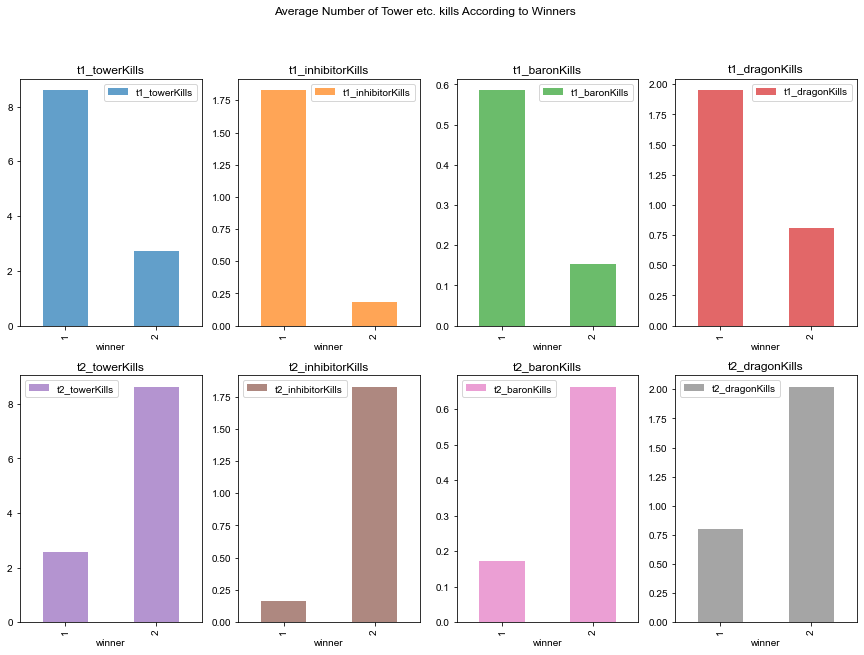

In [10]:
f=new_match.groupby("winner").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,4),alpha=0.7,title="Average Number of Tower etc. kills According to Winners")
f= sns.set_style("darkgrid")
f=sns.set_context("paper")
plt.show()

# Data Preprocessing

## Data Splitting

In [11]:
matchtest = match.copy()

In [12]:
x=matchtest.drop(['winner'],axis=1)
y=matchtest['winner']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x1, x_test, y1, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100, shuffle=True, stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size = 0.2, random_state = 100, shuffle=True, stratify = y1)

In [15]:
print('Presentase training data  :', '%.2f' % ((len(x_train)/len(x))*100), '%')
print('Presentase validation data:', '%.2f' % ((len(x_val)/len(x))*100), '%')
print('Presentase untuk test data:', '%.2f' % ((len(x_test)/len(x))*100), '%')
print()

print('Jumlah training  :', x_train.shape[0])
print('Jumlah validation:', x_val.shape[0])
print('Jumlah test      :', x_test.shape[0])

Presentase training data  : 64.00 %
Presentase validation data: 16.00 %
Presentase untuk test data: 20.00 %

Jumlah training  : 32953
Jumlah validation: 8239
Jumlah test      : 10298


In [143]:
x_train.columns

Index(['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills',
       't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills'],
      dtype='object')

## Feature Scaling

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
pipe = Pipeline([("scaler", StandardScaler())])

In [18]:
scaler = StandardScaler()

In [19]:
x_train_ss = scaler.fit_transform(x_train)
x_test_ss = scaler.fit_transform(x_test)

In [20]:
x_train_trans = pipe.fit_transform(x_train)
x_valid_trans = pipe.transform(x_val)
x_test_trans = pipe.transform(x_test)

# Defining Model

## Unsupervised Learning

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [22]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()

## Artificial Neural Network

In [23]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_auc_score, recall_score

In [26]:
seq_1 = keras.Sequential([                   
   keras.layers.Dense(32, input_shape=(16,), activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(16, activation='relu'), 
   keras.layers.Dropout(0.5),
   keras.layers.Dense(8, activation='relu'), 
   keras.layers.Dropout(0.5),
   keras.layers.Dense(1, activation='sigmoid')                         
])

seq_1.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [27]:
keras.utils.plot_model(seq_1, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [28]:
seq_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [30]:
x_train_trans = pipe.fit_transform(x_train)
x_valid_trans = pipe.transform(x_val)
x_test_trans = pipe.transform(x_test)

# Training Test

### Logistic Regression

In [31]:
lr_train = lr.fit(x_train_ss,y_train)
lr_test = lr.fit(x_test_ss,y_test)
print('Training Accuracy:','%.3f' % lr_train.score(x_train_ss,y_train))
print('Test Accuracy:', '%.3f' % lr_test.score(x_test_ss,y_test))

Training Accuracy: 0.963
Test Accuracy: 0.961


In [32]:
#Predict training set
y_pred_lr_train = lr.predict(x_train_ss)
print(classification_report(y_train, y_pred_lr_train))

              precision    recall  f1-score   support

           1       0.96      0.97      0.96     16689
           2       0.97      0.96      0.96     16264

    accuracy                           0.96     32953
   macro avg       0.96      0.96      0.96     32953
weighted avg       0.96      0.96      0.96     32953



In [33]:
#Predict test set
y_pred_lr_test = lr.predict(x_test_ss)
print(classification_report(y_test, y_pred_lr_test))

              precision    recall  f1-score   support

           1       0.96      0.97      0.96      5215
           2       0.96      0.96      0.96      5083

    accuracy                           0.96     10298
   macro avg       0.96      0.96      0.96     10298
weighted avg       0.96      0.96      0.96     10298



In [34]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_train, y_pred_lr_train)

0.9631247657406169

In [35]:
#Check performa dari model test menggunakan auc score
roc_auc_score(y_test, y_pred_lr_test)

0.9605136139886137

### Random Forest Classifier 

In [36]:
rfc_train = rfc.fit(x_train_ss,y_train)
rfc_test = rfc.fit(x_test_ss,y_test)
print('Training Accuracy:', '%.3f' % rfc_train.score(x_train,y_train))
print('Test Accuracy:', '%.3f' % rfc_test.score(x_test,y_test))

Training Accuracy: 0.692
Test Accuracy: 0.695


In [37]:
#Predict training set
y_pred_rfc_train = rfc.predict(x_train_ss)
print(classification_report(y_train, y_pred_rfc_train))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97     16689
           2       0.98      0.97      0.97     16264

    accuracy                           0.97     32953
   macro avg       0.97      0.97      0.97     32953
weighted avg       0.97      0.97      0.97     32953



In [38]:
#Predict test set
y_pred_rfc_test = rfc.predict(x_test_ss)
print(classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      5215
           2       0.99      0.99      0.99      5083

    accuracy                           0.99     10298
   macro avg       0.99      0.99      0.99     10298
weighted avg       0.99      0.99      0.99     10298



In [39]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_train, y_pred_rfc_train)

0.970614882083586

In [40]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_test, y_pred_rfc_test)

0.9901296578428007

### Decision Tree Classifier

In [41]:
dt_train = dtc.fit(x_train_ss,y_train)
dt_test = dtc.fit(x_test_ss,y_test)
print('Training Accuracy:', '%.3f' % dt_train.score(x_train_ss,y_train))
print('Test Accuracy:', '%.3f' % dt_test.score(x_test_ss,y_test))

Training Accuracy: 0.960
Test Accuracy: 0.990


In [42]:
#Predict testing set
y_pred_dtc_train = dtc.predict(x_train_ss)
print(classification_report(y_train, y_pred_dtc_train))

              precision    recall  f1-score   support

           1       0.96      0.97      0.96     16689
           2       0.96      0.95      0.96     16264

    accuracy                           0.96     32953
   macro avg       0.96      0.96      0.96     32953
weighted avg       0.96      0.96      0.96     32953



In [43]:
#Predict test set
y_pred_dtc_test = dtc.predict(x_test_ss)
print(classification_report(y_test, y_pred_dtc_test))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      5215
           2       1.00      0.99      0.99      5083

    accuracy                           0.99     10298
   macro avg       0.99      0.99      0.99     10298
weighted avg       0.99      0.99      0.99     10298



In [44]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_train, y_pred_dtc_train)

0.9598965675468557

In [45]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_test, y_pred_dtc_test)

0.9901271680138464

### XGBoost

In [46]:
xgb_train = xgb.fit(x_train_ss,y_train)
xgb_test = xgb.fit(x_test_ss,y_test)
print('Training Accuracy:', '%.3f' % xgb_train.score(x_train_ss,y_train))
print('Test Accuracy:', '%.3f' % xgb_test.score(x_test_ss,y_test))

[08:33:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:33:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.970
Test Accuracy: 0.990


In [47]:
#Predict testing set
y_pred_xgb_train = xgb.predict(x_train_ss)
print(classification_report(y_train, y_pred_xgb_train))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97     16689
           2       0.97      0.96      0.97     16264

    accuracy                           0.97     32953
   macro avg       0.97      0.97      0.97     32953
weighted avg       0.97      0.97      0.97     32953



In [48]:
#Predict testing set
y_pred_xgb_test = xgb.predict(x_test_ss)
print(classification_report(y_test, y_pred_xgb_test))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      5215
           2       0.99      0.99      0.99      5083

    accuracy                           0.99     10298
   macro avg       0.99      0.99      0.99     10298
weighted avg       0.99      0.99      0.99     10298



In [49]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_train, y_pred_xgb_train)

0.969772874613635

In [50]:
#Check performa dari model menggunakan auc score
roc_auc_score(y_test, y_pred_xgb_test)

0.9899379032886301

## Artificial Neural Network 

In [51]:
history = seq_1.fit(x_train_trans, y_train, epochs=50, batch_size=10, verbose = 1,
                    validation_data = (x_valid_trans, y_val), callbacks=[early_stop])

Epoch 1/50
3296/3296 [==============================] - 8s 2ms/step - loss: -686612.3125 - accuracy: 0.4982 - val_loss: -3160148.2500 - val_accuracy: 0.5065
Epoch 2/50
3296/3296 [==============================] - 8s 2ms/step - loss: -14427946.0000 - accuracy: 0.5064 - val_loss: -32741900.0000 - val_accuracy: 0.5065
Epoch 3/50
3296/3296 [==============================] - 7s 2ms/step - loss: -71468840.0000 - accuracy: 0.5064 - val_loss: -122533024.0000 - val_accuracy: 0.5065
Epoch 4/50
3296/3296 [==============================] - 8s 2ms/step - loss: -206206912.0000 - accuracy: 0.5064 - val_loss: -313670592.0000 - val_accuracy: 0.5065
Epoch 5/50
3296/3296 [==============================] - 7s 2ms/step - loss: -475096096.0000 - accuracy: 0.5064 - val_loss: -661231168.0000 - val_accuracy: 0.5065
Epoch 6/50
3296/3296 [==============================] - 6s 2ms/step - loss: -923604288.0000 - accuracy: 0.5064 - val_loss: -1221813248.0000 - val_accuracy: 0.5065
Epoch 7/50
3296/3296 [=============

3296/3296 [==============================] - 6s 2ms/step - loss: -2625582399488.0000 - accuracy: 0.5064 - val_loss: -2732294668288.0000 - val_accuracy: 0.5065
Epoch 50/50
3296/3296 [==============================] - 6s 2ms/step - loss: -2831326904320.0000 - accuracy: 0.5064 - val_loss: -2953559932928.0000 - val_accuracy: 0.5065


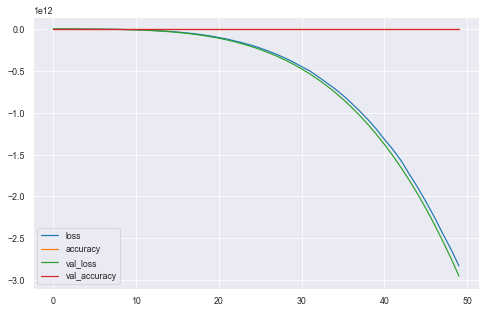

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca()
plt.show()

In [53]:
seq_1.evaluate(x_valid_trans,y_val)

258/258 [==============================] - 0s 1ms/step - loss: -2953559670784.0000 - accuracy: 0.5065


[-2953559670784.0, 0.5064935088157654]

In [54]:
pred = seq_1.predict(x_valid_trans)
y_pred_seq = []
for element in pred:
    if element > 0.5:
        y_pred_seq.append(1)
    else :
        y_pred_seq.append(0)

In [55]:
print(classification_report(y_val, y_pred_seq))

              precision    recall  f1-score   support

           1       0.51      1.00      0.67      4173
           2       0.00      0.00      0.00      4066

    accuracy                           0.51      8239
   macro avg       0.25      0.50      0.34      8239
weighted avg       0.26      0.51      0.34      8239



# Model Improvement

In [56]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

## Unsupervised Learning

### Logistic Regression 

In [57]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)

In [58]:
lr_cv = GridSearchCV(lr, hyperparameters, cv=10)

In [59]:
best_model = lr_cv.fit(x,y)

In [60]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.615848211066026


In [61]:
y_pred_lr_best = best_model.predict(x_test_ss)

In [62]:
print(classification_report(y_test, y_pred_lr_best))
roc_auc_score(y_test, y_pred_lr_best)

              precision    recall  f1-score   support

           1       0.87      0.84      0.85      5215
           2       0.84      0.87      0.86      5083

    accuracy                           0.86     10298
   macro avg       0.86      0.86      0.86     10298
weighted avg       0.86      0.86      0.86     10298



0.8558270391274734

### Random Forest Classifier 

In [63]:
from pprint import pprint

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [65]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [66]:
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [67]:
rfc_random.best_params_
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [68]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [69]:
rfc_base = RandomForestClassifier(n_estimators = 400, random_state = 100)
rfc_base.fit(x_train_ss, y_train)
base_accuracy = evaluate(rfc_base, x_train_ss, y_train)

Model Performance
Average Error: 0.0104 degrees.
Accuracy = 99.35%.


In [70]:
rfc_best = rfc_random.best_estimator_
random_accuracy = evaluate(rfc_best, x_test_ss, y_test)

Model Performance
Average Error: 0.1906 degrees.
Accuracy = 89.58%.


In [71]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -9.84%.


In [72]:
y_pred_rfc_best = rfc_best.predict(x_test_ss)

In [73]:
print(classification_report(y_test, y_pred_rfc_best))
roc_auc_score(y_test, y_pred_rfc_best)

              precision    recall  f1-score   support

           1       0.74      0.96      0.84      5215
           2       0.95      0.65      0.77      5083

    accuracy                           0.81     10298
   macro avg       0.84      0.81      0.80     10298
weighted avg       0.84      0.81      0.80     10298



0.8073610095426467

### Decision Tree Classifier

In [74]:
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
grid_decision_tree=GridSearchCV(estimator=dtc,cv=15,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [75]:
grid_decision_tree.fit(x_train_ss,y_train)
print("best score: ", grid_decision_tree.best_score_)
print("best param: ", grid_decision_tree.best_params_)

best score:  0.9690168522014482
best param:  {'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}


In [76]:
dtc_grid=DecisionTreeClassifier(criterion="entropy",max_depth=9, splitter="best")
dtc_grid.fit(x_train_ss,y_train)
print("score:", dtc_grid.score(x_test_ss,y_test))

score: 0.9674694115362207


### XGBoost

In [77]:
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [78]:
xgb_grid=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [79]:
#model fitting
xgb_grid.fit(x_test_ss,y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  25 | elapsed:    0.9s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed:    1.5s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    2.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.1s finished


[08:53:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=16,
                                           num_p...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [80]:
#parameters selected
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
best_score = xgb_grid.best_score_
best_params = xgb_grid.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9971181799845844
Best params: 
colsample_bytree: 0.3
gamma: 0.2
learning_rate: 0.15
max_depth: 4
min_child_weight: 3


# Model Inference

In [82]:
match.columns

Index(['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills',
       't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills'],
      dtype='object')

In [169]:
print('1 = DWG KIA')
print('2 = EDG')

1 = DWG KIA
2 = EDG


In [164]:
print('skema 1')

skema 1


In [151]:
match1= {'firstBlood': [2],
         'firstTower': [2],
         'firstInhibitor': [2],
         'firstBaron': [2],
         'firstDragon': [2],
         'firstRiftHerald' : [1],
         't1_towerKills' : [4],
         't1_inhibitorKills': [0],
         't1_baronKills': [0],
         't1_dragonKills': [0],
         't1_riftHeraldKills': [1],
         't2_towerKills': [11],
         't2_inhibitorKills': [3],
         't2_baronKills': [1],
         't2_dragonKills': [4],
         't2_riftHeraldKills': [1]}

In [152]:
one = pd.DataFrame(match1)
one

firstBlood  firstTower  firstInhibitor  firstBaron  firstDragon  \
0           2           2               2           2            2   

   firstRiftHerald  t1_towerKills  t1_inhibitorKills  t1_baronKills  \
0                1              4                  0              0   

   t1_dragonKills  t1_riftHeraldKills  t2_towerKills  t2_inhibitorKills  \
0               0                   1             11                  3   

   t2_baronKills  t2_dragonKills  t2_riftHeraldKills  
0              1               4                   1

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [154]:
pipe = Pipeline([("scaler", StandardScaler())])

In [155]:
x_pred = one

In [156]:
x_pred = pipe.fit_transform(x_pred)

In [171]:
print('1 = DWG KIA')
print('2 = EDG')
c=rfc_best.predict_proba(x_pred).reshape(-1,1)
print("winner is :" , rfc_best.predict(x_pred))
print("Blue team win probability is % ", list(c[0]*100),"\nRed team win probability is %:",list(c[1]*100)  )

1 = DWG KIA
2 = EDG
winner is : [1]
Blue team win probability is %  [52.30237424632188] 
Red team win probability is %: [47.6976257536781]


In [163]:
print('questionable')

questionable


In [159]:
print('skema 2')

skema 2


In [172]:
print('1 = DWG KIA')
print('2 = EDG')
print('match 1')
x1=[[2,2,2,2,2,1,4,0,0,0,1,11,3,1,4,1]]
c=rfc_best.predict_proba(x1).reshape(-1,1)
print("winner is :" , rfc_best.predict(x1) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

1 = DWG KIA
2 = EDG
match 1
winner is : [2]
first team win probability is %  [0.0] 
second team win probability is %: [100.0]


In [162]:
print('beda skema 1 dan skema 2 apaan ya? tapi skema 2 itu yang bener')

beda skema 1 dan skema 2 apaan ya? tapi skema 2 itu yang bener


In [173]:
print('1 = DWG KIA')
print('2 = EDG')
print('match 2')
x2=[[1,1,1,2,2,1,10,2,1,3,1,2,0,1,1,1]]
c=rfc_best.predict_proba(x2).reshape(-1,1)
print("winner is :" , rfc_best.predict(x2) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

1 = DWG KIA
2 = EDG
match 2
winner is : [1]
first team win probability is %  [100.0] 
second team win probability is %: [0.0]


In [174]:
print('1 = DWG KIA')
print('2 = EDG')
print('match 3')
x3=[[2,2,1,1,1,1,6,1,1,4,1,3,0,0,0,1]]
c=rfc_best.predict_proba(x3).reshape(-1,1)
print("winner is :" , rfc_best.predict(x3) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

1 = DWG KIA
2 = EDG
match 3
winner is : [1]
first team win probability is %  [99.91593420671066] 
second team win probability is %: [0.08406579328938506]


In [176]:
print('1 = DWG KIA')
print('2 = EDG')
print('match 4')
x4=[[2,2,2,2,2,2,2,0,0,0,0,9,1,1,4,2]]
c=rfc_best.predict_proba(x4).reshape(-1,1)
print("winner is :" , rfc_best.predict(x4) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

1 = DWG KIA
2 = EDG
match 4
winner is : [2]
first team win probability is %  [0.0066337236278282705] 
second team win probability is %: [99.99336627637217]


In [177]:
print('1 = DWG KIA')
print('2 = EDG')
print('match 5')
x5=[[2,1,2,1,1,1,6,0,1,1,2,11,2,1,5,0]]
c=rfc_best.predict_proba(x5).reshape(-1,1)
print("winner is :" , rfc_best.predict(x5) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

1 = DWG KIA
2 = EDG
match 5
winner is : [2]
first team win probability is %  [0.33139971139971136] 
second team win probability is %: [99.6686002886003]
